# Prophet - Forecast

In [526]:
import pandas as pd
filtered_df = pd.read_excel('../../data/Lstm_Dates.xlsx')
# Replace all missing values (NaN) in the 'items' column with 'Rice (Rs/kg)_Nadu 2'
filtered_df['items'] = filtered_df['items'].fillna('Rice (Rs/kg)_Nadu 2')
filtered_df.head(15)

,date,items,pettah_average,pettah_min_value,pettah_max_value,food_inflation_Base_2013,percipitation,Bankrupt,pettah_range,pettah_midpoint
0,2019-05-31,Rice (Rs/kg)_Nadu 2,84.0,83.0,85.0,131.1,0.84,0.0,2.0,84.0
1,2019-06-01,Rice (Rs/kg)_Nadu 2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2019-06-02,Rice (Rs/kg)_Nadu 2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2019-06-03,Rice (Rs/kg)_Nadu 2,84.0,83.0,85.0,134.5,9.28,0.0,2.0,84.0
4,2019-06-04,Rice (Rs/kg)_Nadu 2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2019-06-05,Rice (Rs/kg)_Nadu 2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,2019-06-06,Rice (Rs/kg)_Nadu 2,82.0,78.0,83.0,134.5,4.34,0.0,5.0,80.5
7,2019-06-07,Rice (Rs/kg)_Nadu 2,81.0,78.0,84.0,134.5,19.28,0.0,6.0,81.0
8,2019-06-08,Rice (Rs/kg)_Nadu 2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,2019-06-09,Rice (Rs/kg)_Nadu 2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Use Interplotation to Fill Missing Values

In [527]:
# Time-based interpolation (useful for datetime indices)
filtered_df['pettah_average'] = filtered_df['pettah_average'].interpolate(method='linear', limit_direction='both')

## Plotting the Pettah Average Price

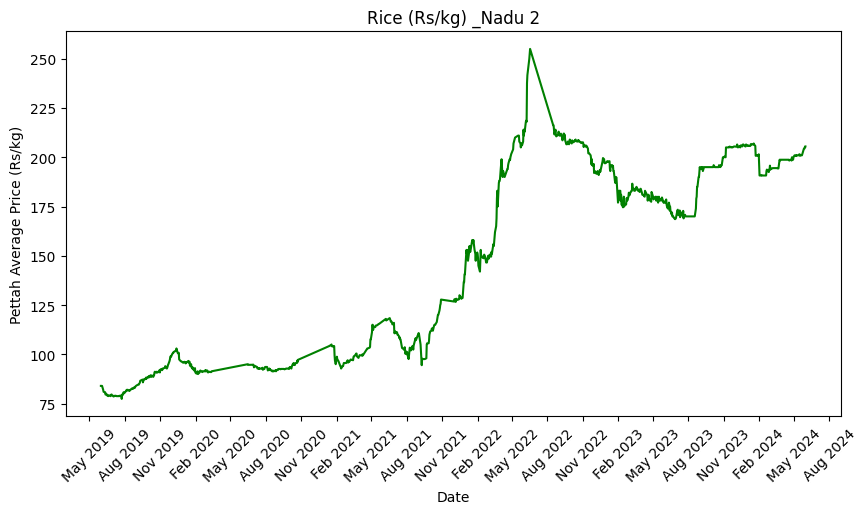

In [528]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates

# Reset the index to make 'date' a regular column
filtered_df = filtered_df.reset_index()
# Ensure 'date' is a datetime object
filtered_df['date'] = pd.to_datetime(filtered_df['date'])

# Set up the plot
fig, ax = plt.subplots(figsize=(10, 5))

# Plot pettah_average over time
sns.lineplot(data=filtered_df, x='date', y='pettah_average', ax=ax, color='green')

# Add titles and labels
ax.set_title('Rice (Rs/kg) _Nadu 2')
ax.set_xlabel('Date')
ax.set_ylabel('Pettah Average Price (Rs/kg)')

# Set x-axis format to show the month and year (e.g., Jan 2024)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))

# Set the interval for x-axis ticks to every 3 months
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=3))

# Rotate date labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.show()

## Drop Features 

In [529]:
# filtered_df.drop(columns=['items','percipitation', 'pettah_min_value', 'pettah_max_value', 'food_inflation_Base_2013', 'Bankrupt',
#                           'percipitation','pettah_range','pettah_midpoint','pettah_avg_sma_150','pettah_avg_sma_14','ema_7','ema_30'], inplace=True)

filtered_df.drop(columns=['items', 'pettah_min_value',
       'pettah_max_value', 'food_inflation_Base_2013', 'percipitation',
       'Bankrupt', 'pettah_range', 'pettah_midpoint'], inplace=True)

In [530]:
filtered_df = filtered_df.drop('index', axis=1) 

In [531]:
filtered_df.head(15)

,date,pettah_average
0,2019-05-31,84.000000
1,2019-06-01,84.000000
2,2019-06-02,84.000000
3,2019-06-03,84.000000
4,2019-06-04,83.333333
5,2019-06-05,82.666667
6,2019-06-06,82.000000
7,2019-06-07,81.000000
8,2019-06-08,80.933333
9,2019-06-09,80.866667


In [532]:
filtered_df.tail(7)

,date,pettah_average
1821,2024-05-25,202.998
1822,2024-05-26,203.664
1823,2024-05-27,204.330
1824,2024-05-28,204.500
1825,2024-05-29,204.500
1826,2024-05-30,205.500
1827,2024-05-31,205.500


## Set Date Column into Index

In [533]:
# Set 'date' as the index of the DataFrame
filtered_df.set_index('date', inplace=True)

## Train/Test Split 

In [534]:
test_data = 366

train = filtered_df[:-test_data]
test = filtered_df[-test_data:]

## Create the train and test data into Prophet Model

In [535]:
# Format data for prophet model using ds and y
train_prophet = train.reset_index() \
    .rename(columns={'date':'ds',
                     'pettah_average':'y'})

# Predict on test set with model
test_prophet = test.reset_index() \
    .rename(columns={'date':'ds',
                     'pettah_average':'y'})

In [536]:
test_prophet.head(10)

,ds,y
0,2023-06-01,177.000000
1,2023-06-02,177.000000
2,2023-06-03,177.533333
3,2023-06-04,178.066667
4,2023-06-05,178.600000
5,2023-06-06,176.000000
6,2023-06-07,175.000000
7,2023-06-08,175.000000
8,2023-06-09,174.000000
9,2023-06-10,175.000000


## Train the model

In [537]:
# import time
from prophet import Prophet

# start_time = time.time()
model = Prophet()
model.fit(train_prophet)
# end_time = time.time()

17:20:58 - cmdstanpy - INFO - Chain [1] start processing
17:20:58 - cmdstanpy - INFO - Chain [1] done processing


## Make Prediction

In [538]:
future = model.make_future_dataframe(periods=7)
forecast = model.predict(future)

In [539]:
forecast.head(10)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2019-05-31,63.913200,67.418686,77.190818,63.913200,63.913200,8.266264,8.266264,8.266264,0.041102,0.041102,0.041102,8.225161,8.225161,8.225161,0.0,0.0,0.0,72.179464
1,2019-06-01,64.155328,68.157298,77.460565,64.155328,64.155328,8.723597,8.723597,8.723597,0.040570,0.040570,0.040570,8.683027,8.683027,8.683027,0.0,0.0,0.0,72.878925
2,2019-06-02,64.397456,69.302252,78.557594,64.397456,64.397456,9.226472,9.226472,9.226472,0.044323,0.044323,0.044323,9.182149,9.182149,9.182149,0.0,0.0,0.0,73.623928
3,2019-06-03,64.639583,69.651004,79.194532,64.639583,64.639583,9.763794,9.763794,9.763794,0.048383,0.048383,0.048383,9.715410,9.715410,9.715410,0.0,0.0,0.0,74.403377
4,2019-06-04,64.881711,70.685122,79.808614,64.881711,64.881711,10.190525,10.190525,10.190525,-0.084196,-0.084196,-0.084196,10.274720,10.274720,10.274720,0.0,0.0,0.0,75.072236
5,2019-06-05,65.123839,70.805574,80.584601,65.123839,65.123839,10.775124,10.775124,10.775124,-0.076081,-0.076081,-0.076081,10.851205,10.851205,10.851205,0.0,0.0,0.0,75.898963
6,2019-06-06,65.365967,72.015946,81.612348,65.365967,65.365967,11.421310,11.421310,11.421310,-0.014102,-0.014102,-0.014102,11.435412,11.435412,11.435412,0.0,0.0,0.0,76.787277
7,2019-06-07,65.608095,72.760621,82.371079,65.608095,65.608095,12.058634,12.058634,12.058634,0.041102,0.041102,0.041102,12.017532,12.017532,12.017532,0.0,0.0,0.0,77.666729
8,2019-06-08,65.850223,73.534048,83.400167,65.850223,65.850223,12.628199,12.628199,12.628199,0.040570,0.040570,0.040570,12.587629,12.587629,12.587629,0.0,0.0,0.0,78.478422
9,2019-06-09,66.092350,74.598853,84.177444,66.092350,66.092350,13.180194,13.180194,13.180194,0.044323,0.044323,0.044323,13.135871,13.135871,13.135871,0.0,0.0,0.0,79.272544


In [540]:
forecast.tail(7)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
1462,2023-06-01,170.154796,174.135441,183.504896,170.154796,170.154796,8.668926,8.668926,8.668926,-0.014102,-0.014102,-0.014102,8.683027,8.683027,8.683027,0.0,0.0,0.0,178.823721
1463,2023-06-02,169.979574,173.915537,183.754455,169.979574,169.979574,9.223251,9.223251,9.223251,0.041102,0.041102,0.041102,9.182149,9.182149,9.182149,0.0,0.0,0.0,179.202825
1464,2023-06-03,169.804352,174.444595,184.270037,169.804352,169.804352,9.755980,9.755980,9.755980,0.040570,0.040570,0.040570,9.715410,9.715410,9.715410,0.0,0.0,0.0,179.560332
1465,2023-06-04,169.629130,175.039351,184.803258,169.629130,169.629130,10.319043,10.319043,10.319043,0.044323,0.044323,0.044323,10.274720,10.274720,10.274720,0.0,0.0,0.0,179.948173
1466,2023-06-05,169.453908,175.366230,185.043928,169.453908,169.453908,10.899588,10.899588,10.899588,0.048383,0.048383,0.048383,10.851205,10.851205,10.851205,0.0,0.0,0.0,180.353496
1467,2023-06-06,169.278686,175.802726,185.454937,169.278686,169.278686,11.351216,11.351216,11.351216,-0.084196,-0.084196,-0.084196,11.435412,11.435412,11.435412,0.0,0.0,0.0,180.629902
1468,2023-06-07,169.103464,176.229970,185.793670,169.103464,169.103464,11.941450,11.941450,11.941450,-0.076081,-0.076081,-0.076081,12.017532,12.017532,12.017532,0.0,0.0,0.0,181.044914


## Forecast Plot

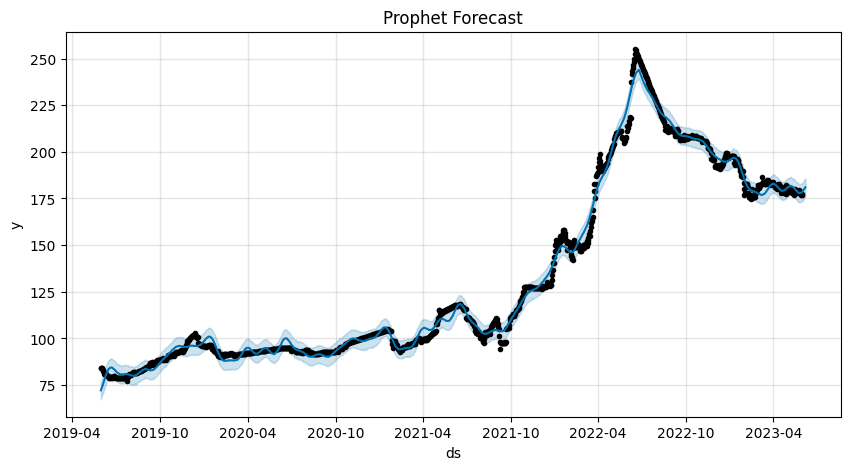

In [541]:
fig, ax = plt.subplots(figsize=(10, 5))
fig = model.plot(forecast, ax=ax)
ax.set_title('Prophet Forecast')
plt.show()

In [542]:
forecast_test = forecast[forecast['ds'].isin(test_prophet['ds'])]
forecast_test.head(10)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
1462,2023-06-01,170.154796,174.135441,183.504896,170.154796,170.154796,8.668926,8.668926,8.668926,-0.014102,-0.014102,-0.014102,8.683027,8.683027,8.683027,0.0,0.0,0.0,178.823721
1463,2023-06-02,169.979574,173.915537,183.754455,169.979574,169.979574,9.223251,9.223251,9.223251,0.041102,0.041102,0.041102,9.182149,9.182149,9.182149,0.0,0.0,0.0,179.202825
1464,2023-06-03,169.804352,174.444595,184.270037,169.804352,169.804352,9.755980,9.755980,9.755980,0.040570,0.040570,0.040570,9.715410,9.715410,9.715410,0.0,0.0,0.0,179.560332
1465,2023-06-04,169.629130,175.039351,184.803258,169.629130,169.629130,10.319043,10.319043,10.319043,0.044323,0.044323,0.044323,10.274720,10.274720,10.274720,0.0,0.0,0.0,179.948173
1466,2023-06-05,169.453908,175.366230,185.043928,169.453908,169.453908,10.899588,10.899588,10.899588,0.048383,0.048383,0.048383,10.851205,10.851205,10.851205,0.0,0.0,0.0,180.353496
1467,2023-06-06,169.278686,175.802726,185.454937,169.278686,169.278686,11.351216,11.351216,11.351216,-0.084196,-0.084196,-0.084196,11.435412,11.435412,11.435412,0.0,0.0,0.0,180.629902
1468,2023-06-07,169.103464,176.229970,185.793670,169.103464,169.103464,11.941450,11.941450,11.941450,-0.076081,-0.076081,-0.076081,12.017532,12.017532,12.017532,0.0,0.0,0.0,181.044914


## Evaluate Model Performances 

In [543]:
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error

# Actual and predicted values
y_true = test_prophet['y'].values

# Take the first 7 values
y_true_first_7 = y_true[:7]  

y_pred = forecast_test['yhat'].values  # convert the series into Numpy array

# Calculate metrics
mae = mean_absolute_error(y_true_first_7, y_pred)
mse = mean_squared_error(y_true_first_7, y_pred)
rmse = np.sqrt(mse)
mape = mean_absolute_percentage_error(y_true_first_7, y_pred)

print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"MAPE: {mape}")

MAE: 2.9090520794915773
MSE: 10.982703029382654
RMSE: 3.3140161480268397
MAPE: 0.01648562279784621


## Visualize the Predictions vs Actual Values

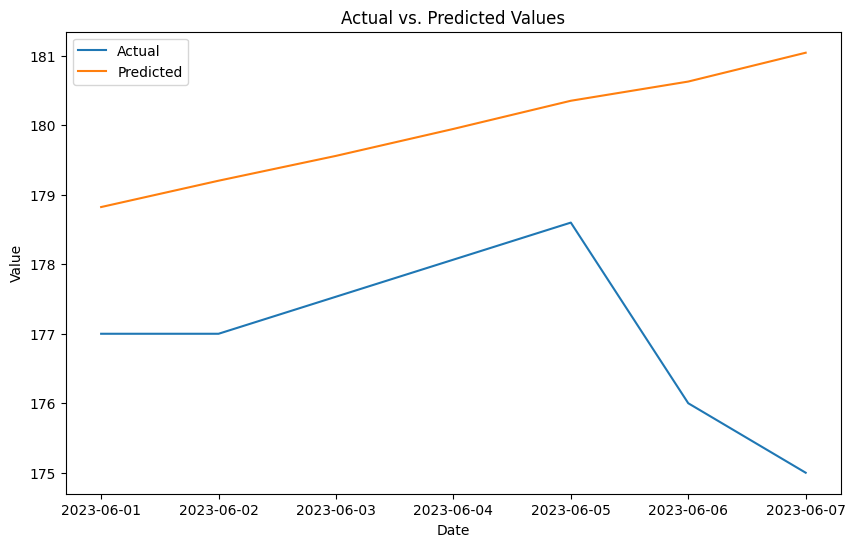

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(forecast_test['ds'], y_true_first_7, label='Actual')
plt.plot(forecast_test['ds'], y_pred, label='Predicted')
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Actual vs. Predicted Values')
plt.legend()
plt.show()

## Plot the Model Components on the Forecast

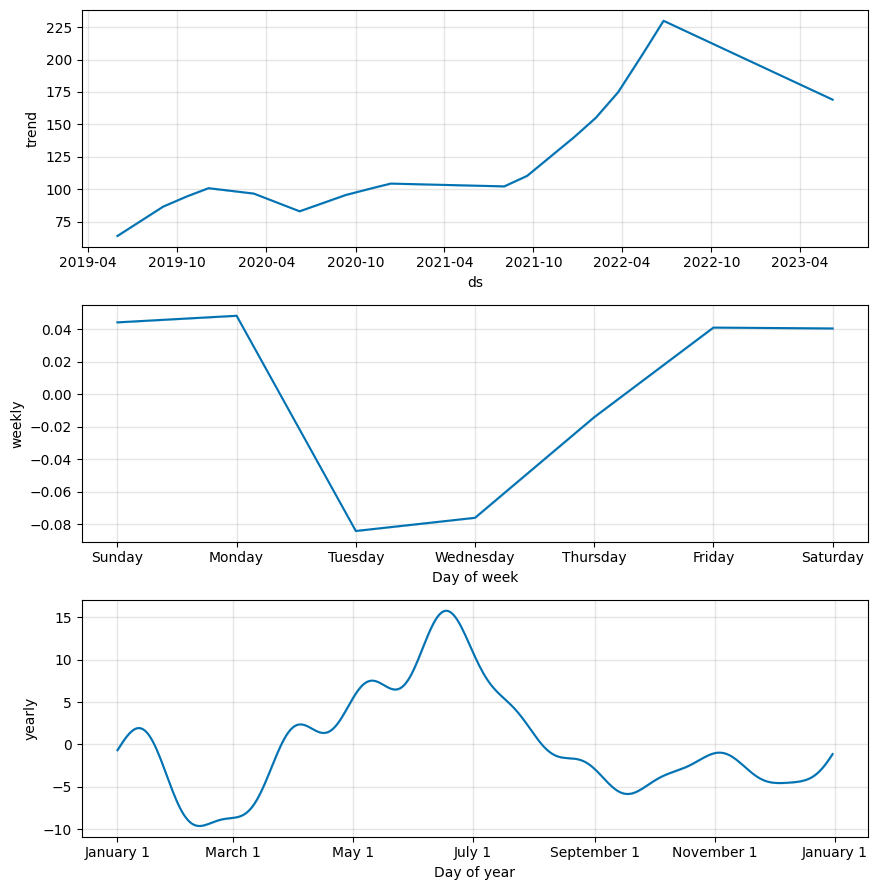

In [ ]:
fig = model.plot_components(forecast)
plt.show()